This time series analysis hopes to find a coorelation between accident location, type of issue, time taken to resolve issue, time of day, day of week, and month of year. This will help predict when and where an accident is likely to happen.

In [107]:
import pandas as pd
import numpy as np
#nothing here works https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [108]:
file = 'C:/Users/tomsh/OneDrive/Documents/Real-Time_Traffic_Incident_Reports/Real-Time_Traffic_Incident_Reports.csv'


In [109]:
df = pd.read_csv(file, parse_dates=['Published Date', 'Status Date'])
df.head()


,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


The column names have spaces in them. This will prove to be a problem with creating visualizations later so I'm going to change the variable names for the applicable columns.

In [110]:
df=df.rename(columns = {'Published Date':'published_date'})
df=df.rename(columns = {'Status Date':'status_date'})
df=df.rename(columns = {'Issue Reported':'issue_reported'})
df=df.rename(columns = {'Traffic Report ID':'tr_ID'})
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


Exploring the Data and Converting Datatypes

In [111]:
df.shape
#big enough

(249650, 9)

In [112]:
df.describe()
#I assume I only get one column because it's the only numerical data type(float)

,Longitude
count,249571.000000
mean,-97.551690
std,4.211096
min,-98.816154
25%,-97.776950
50%,-97.734295
75%,-97.687038
max,0.000000


In [113]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249650 entries, 0 to 249649
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   tr_ID           249650 non-null  object             
 1   published_date  249650 non-null  datetime64[ns, UTC]
 2   issue_reported  249650 non-null  object             
 3   Location        249107 non-null  object             
 4   Latitude        249525 non-null  float64            
 5   Longitude       249571 non-null  float64            
 6   Address         249650 non-null  object             
 7   Status          247957 non-null  object             
 8   status_date     249650 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 17.1+ MB
None


In [114]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

#So it may be better to create a new location variable as there are far less null values for longitude and latitude 
#than for location. Status can likely be removed entirely.
#Clearly the attempt to turn location into a float did not work. Also, instances of null in Latitude increased by 46.

,count,%
tr_ID,0,0.000000
published_date,0,0.000000
issue_reported,0,0.000000
Address,0,0.000000
status_date,0,0.000000
Longitude,79,0.031644
Latitude,125,0.050070
Location,543,0.217505
Status,1693,0.678149


In [115]:
df['issue_reported'].unique()

array(['Crash Service', 'Traffic Hazard', 'Crash Urgent', 'VEHICLE FIRE',
       'TRFC HAZD/ DEBRIS', 'COLLISION WITH INJURY', 'zSTALLED VEHICLE',
       'COLLISION', 'COLLISN/ LVNG SCN', 'LOOSE LIVESTOCK',
       'Stalled Vehicle', 'BLOCKED DRIV/ HWY',
       'COLLISION/PRIVATE PROPERTY', 'BOAT ACCIDENT', 'FLEET ACC/ INJURY',
       'Traffic Impediment', 'AUTO/ PED', 'TRAFFIC FATALITY',
       'OBSTRUCT HWY', 'ICY ROADWAY', 'COLLISN / FTSRA',
       'N / HZRD TRFC VIOL', 'HIGH WATER', 'FLEET ACC/ FATAL'],
      dtype=object)

In [116]:
issue_date = df[['issue_reported', 'published_date', 'status_date']]
print(issue_date.head())
#As mentioned above, subtracting the published date from the status date will help find out how long these issues 
#take to resolve which will be useful in helping avoid parts of town. 
#The date and time are listed together, which may come in handy when classifying the severity of issues, but the 
#date and time values will have to be seperated when we try to decipher seasonal and time of day data.

   issue_reported            published_date               status_date
0   Crash Service 2018-06-13 06:35:59+00:00 2018-06-13 09:00:03+00:00
1  Traffic Hazard 2018-06-13 10:15:36+00:00 2018-06-13 11:20:03+00:00
2    Crash Urgent 2020-04-17 21:25:03+00:00 2020-04-17 21:55:03+00:00
3  Traffic Hazard 2020-04-17 21:40:52+00:00 2020-04-17 21:55:03+00:00
4    Crash Urgent 2020-04-17 21:00:55+00:00 2020-04-17 23:30:04+00:00


In [117]:
df['Address'].value_counts()
#Clearly some Adresses are more prone to accidents. These appear to be a series of intersections that can also be
#identified through location data. Example: E Parmer Ln & Dessau Rd (177 issues reported) is location
#30.387004,-97.648592 (381 issues reported). This suggests that perhaps the location indicator may be more accurate
#even though addresses are easier to communicate

E Parmer Ln & Dessau Rd                   177
9300 S Ih 35 Svrd Sb                      164
E Riverside Dr & S Pleasant Valley Rd     157
Fm 969 Rd & N Fm 973 Rd                   154
Dessau Rd & E Parmer Ln                   150
                                         ... 
Johnny Morris Rd & Craybrough Cir           1
10700 THAXTON RD                            1
13900-14000 THOMAS SINCLAIR BLVD            1
2500-2515 E Martin Luther King Jr Blvd      1
11725 JOHNSON RD                            1
Name: Address, Length: 82698, dtype: int64

In [118]:
address_date = df[['Address', 'published_date', 'status_date']]
print(issue_date.head())

   issue_reported            published_date               status_date
0   Crash Service 2018-06-13 06:35:59+00:00 2018-06-13 09:00:03+00:00
1  Traffic Hazard 2018-06-13 10:15:36+00:00 2018-06-13 11:20:03+00:00
2    Crash Urgent 2020-04-17 21:25:03+00:00 2020-04-17 21:55:03+00:00
3  Traffic Hazard 2020-04-17 21:40:52+00:00 2020-04-17 21:55:03+00:00
4    Crash Urgent 2020-04-17 21:00:55+00:00 2020-04-17 23:30:04+00:00


In [119]:
df['Location'].value_counts() 
#It may be a good a idea to remove outliers here and focus on high volume areas.
#Can we create a dataframe that uses a condition on the value_count() function to focus on high frequency areas?

#This no longer works after being changed to float data type.

(30.256997,-97.611818)    396
(30.387004,-97.648592)    381
(30.173724,-97.823807)    370
(30.164182,-97.692911)    349
(30.349292,-97.538573)    306
                         ... 
(30.173901,-97.840154)      1
(30.346702,-97.710642)      1
(30.268535,-97.624045)      1
(30.387425,-97.996589)      1
(30.243353,-97.690299)      1
Name: Location, Length: 116904, dtype: int64

Changing the date columns from strings to date objects and creating a new column called issue timespan by subtracting published date from status date. There is a breakdown of different time measures for this columns in different columns.

In [120]:
pub_day = df['published_date'].dt.dayofweek
df['published_day'] = pub_day
pub_day = df['status_date'].dt.dayofweek
df['status_day'] = pub_day

df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4


In [121]:
issue_time = df['status_date'] - df['published_date']
df['issue_timespan'] = issue_time
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09


In [122]:
issue_timespan_sec = df['issue_timespan'].value_counts()
df['issue_reported_value'] = issue_timespan_sec
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan,issue_reported_value
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,NaN
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,NaN
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,NaN
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,NaN
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,NaN


In [123]:
df['timespan_sec'] = df.issue_timespan.apply(lambda x: x.total_seconds())
df['timespan_min'] = df['timespan_sec']/60
df['timespan_hrs'] = df['timespan_min']/60
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan,issue_reported_value,timespan_sec,timespan_min,timespan_hrs
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,NaN,8644.0,144.066667,2.401111
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,NaN,3867.0,64.450000,1.074167
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,NaN,1800.0,30.000000,0.500000
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,NaN,851.0,14.183333,0.236389
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,NaN,8949.0,149.150000,2.485833


There are many latitude null values so I tried splitting the Location column into two different strings and converting them to 
numbers. This resulted 

In [124]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
tr_ID,0,0.000000
published_date,0,0.000000
issue_reported,0,0.000000
Address,0,0.000000
status_date,0,0.000000
published_day,0,0.000000
status_day,0,0.000000
issue_timespan,0,0.000000
timespan_sec,0,0.000000
timespan_min,0,0.000000


In [126]:
df['short_ID'] = df['tr_ID'].str.slice(0,3)
df = df.drop('tr_ID', 1)
df = df.drop('Status', 1)
df = df.drop('issue_reported_value', 1)
df.head()

,published_date,issue_reported,Location,Latitude,Longitude,Address,status_date,published_day,status_day,issue_timespan,timespan_sec,timespan_min,timespan_hrs,short_ID
0,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,8644.0,144.066667,2.401111,C16
1,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,3867.0,64.450000,1.074167,6B2
2,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,1800.0,30.000000,0.500000,2A7
3,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,851.0,14.183333,0.236389,89D
4,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,8949.0,149.150000,2.485833,E7F


In [127]:
df.set_index('short_ID', inplace = True)
df.head()

,published_date,issue_reported,Location,Latitude,Longitude,Address,status_date,published_day,status_day,issue_timespan,timespan_sec,timespan_min,timespan_hrs
short_ID,,,,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,8644.0,144.066667,2.401111
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,3867.0,64.450000,1.074167
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,1800.0,30.000000,0.500000
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,851.0,14.183333,0.236389
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,8949.0,149.150000,2.485833


In [128]:
avg_mean = df['issue_timespan'].mean()
print(avg_mean)
print(avg_mean.total_seconds())

3 days 05:50:23.870238333
280223.870238


In [129]:
min_span = df['issue_timespan'].min()
print(min_span)
print(min_span.total_seconds())

-17577 days +05:40:00
-1518632400.0


In [130]:
max_span = df['issue_timespan'].max()
print(max_span)
print(max_span.total_seconds())

233 days 08:49:00
20162940.0


In [131]:
df['timespan_hrs'][df['timespan_hrs'] > 4]

short_ID
456    16.568333
0AE     5.371667
94B     4.740833
EAE     4.831944
A72     4.396944
         ...    
B27     6.262778
366     4.398611
C03     7.490000
D9D     7.374444
20B     4.440000
Name: timespan_hrs, Length: 21217, dtype: float64

In [132]:
df['timespan_hrs'][df['timespan_hrs'] > 8]

short_ID
456    16.568333
138     9.574444
E6C     9.049722
E66     9.196667
6A0     8.785000
         ...    
409    12.028889
111    10.609444
231     8.255278
DE3     8.475556
3E7    10.008889
Name: timespan_hrs, Length: 4872, dtype: float64

In [133]:
df['timespan_hrs'][df['timespan_hrs'] > 16]

short_ID
456    16.568333
DA5    19.073889
E7F    18.875000
E19    18.511944
515    18.348889
         ...    
F7B    48.100278
2BA    48.077778
9A2    48.080833
87E    29.231111
BD1    21.120556
Name: timespan_hrs, Length: 3950, dtype: float64

In [134]:
df['timespan_hrs'][df['timespan_hrs'] > 32]

short_ID
A1E    5407.633333
F81    5002.183333
2B8    5431.100000
022      44.416667
FE6      48.116667
          ...     
008      48.027500
5B3      48.020278
F7B      48.100278
2BA      48.077778
9A2      48.080833
Name: timespan_hrs, Length: 3896, dtype: float64

In [135]:
df['timespan_hrs'][df['timespan_hrs'] > 64]

short_ID
A1E    5407.633333
F81    5002.183333
2B8    5431.100000
CE3    5569.416667
CE5    5511.166667
          ...     
AD8    5189.533333
AD8    5021.850000
ADA    5560.566667
ADA    5200.866667
ADA    5104.033333
Name: timespan_hrs, Length: 3841, dtype: float64

In [136]:
#timespandf['timespan_hrs'][df['timespan_hrs'] > 64]
print(df.shape)

(249650, 13)


In [137]:
df = df[df.timespan_sec > 0]
print(df.shape)

(249619, 13)


In [138]:
df = df[df.timespan_hrs < 8.0]
print(df.shape)

(244728, 13)


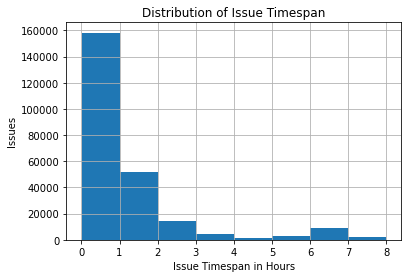

In [139]:
df.timespan_hrs[df.timespan_hrs < 8].hist(bins=8)
plt.xlabel('Issue Timespan in Hours')
plt.ylabel('Issues')
plt.title('Distribution of Issue Timespan');
#I choose the cut off at 8 hours and looking at this graph it starts to fluctuate after 4 hours.

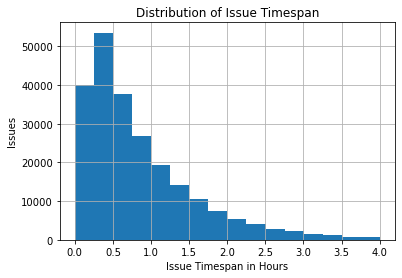

In [140]:
df.timespan_hrs[df.timespan_hrs < 4].hist(bins=16)
plt.xlabel('Issue Timespan in Hours')
plt.ylabel('Issues')
plt.title('Distribution of Issue Timespan');

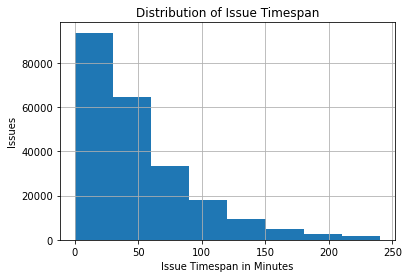

In [141]:
df.timespan_min[df.timespan_min < 240].hist(bins=8)
plt.xlabel('Issue Timespan in Minutes')
plt.ylabel('Issues')
plt.title('Distribution of Issue Timespan');

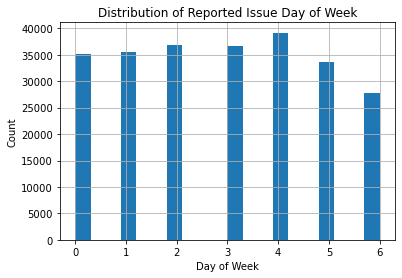

In [142]:
df.published_day.hist(bins=20)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Reported Issue Day of Week');

In [143]:
df['issue_reported'].value_counts()
#Unsure about the meaning of some of these headings mean but the best way to categorize these issues in by 
#subtracting the published date from the status date and finding out how long these issues take to resolve.

Traffic Hazard                75875
Crash Urgent                  57462
Crash Service                 36401
COLLISION                     21583
TRFC HAZD/ DEBRIS             17335
zSTALLED VEHICLE               8775
LOOSE LIVESTOCK                5926
Traffic Impediment             5881
COLLISION WITH INJURY          5861
COLLISN/ LVNG SCN              4214
Stalled Vehicle                2848
COLLISION/PRIVATE PROPERTY      955
VEHICLE FIRE                    800
BLOCKED DRIV/ HWY               500
BOAT ACCIDENT                   100
AUTO/ PED                        66
TRAFFIC FATALITY                 59
ICY ROADWAY                      38
FLEET ACC/ INJURY                32
N / HZRD TRFC VIOL                7
OBSTRUCT HWY                      5
FLEET ACC/ FATAL                  2
HIGH WATER                        2
COLLISN / FTSRA                   1
Name: issue_reported, dtype: int64

In [144]:
df = df.groupby('issue_reported').filter(lambda x : len(x)>100)
print(df.shape)

(244416, 13)


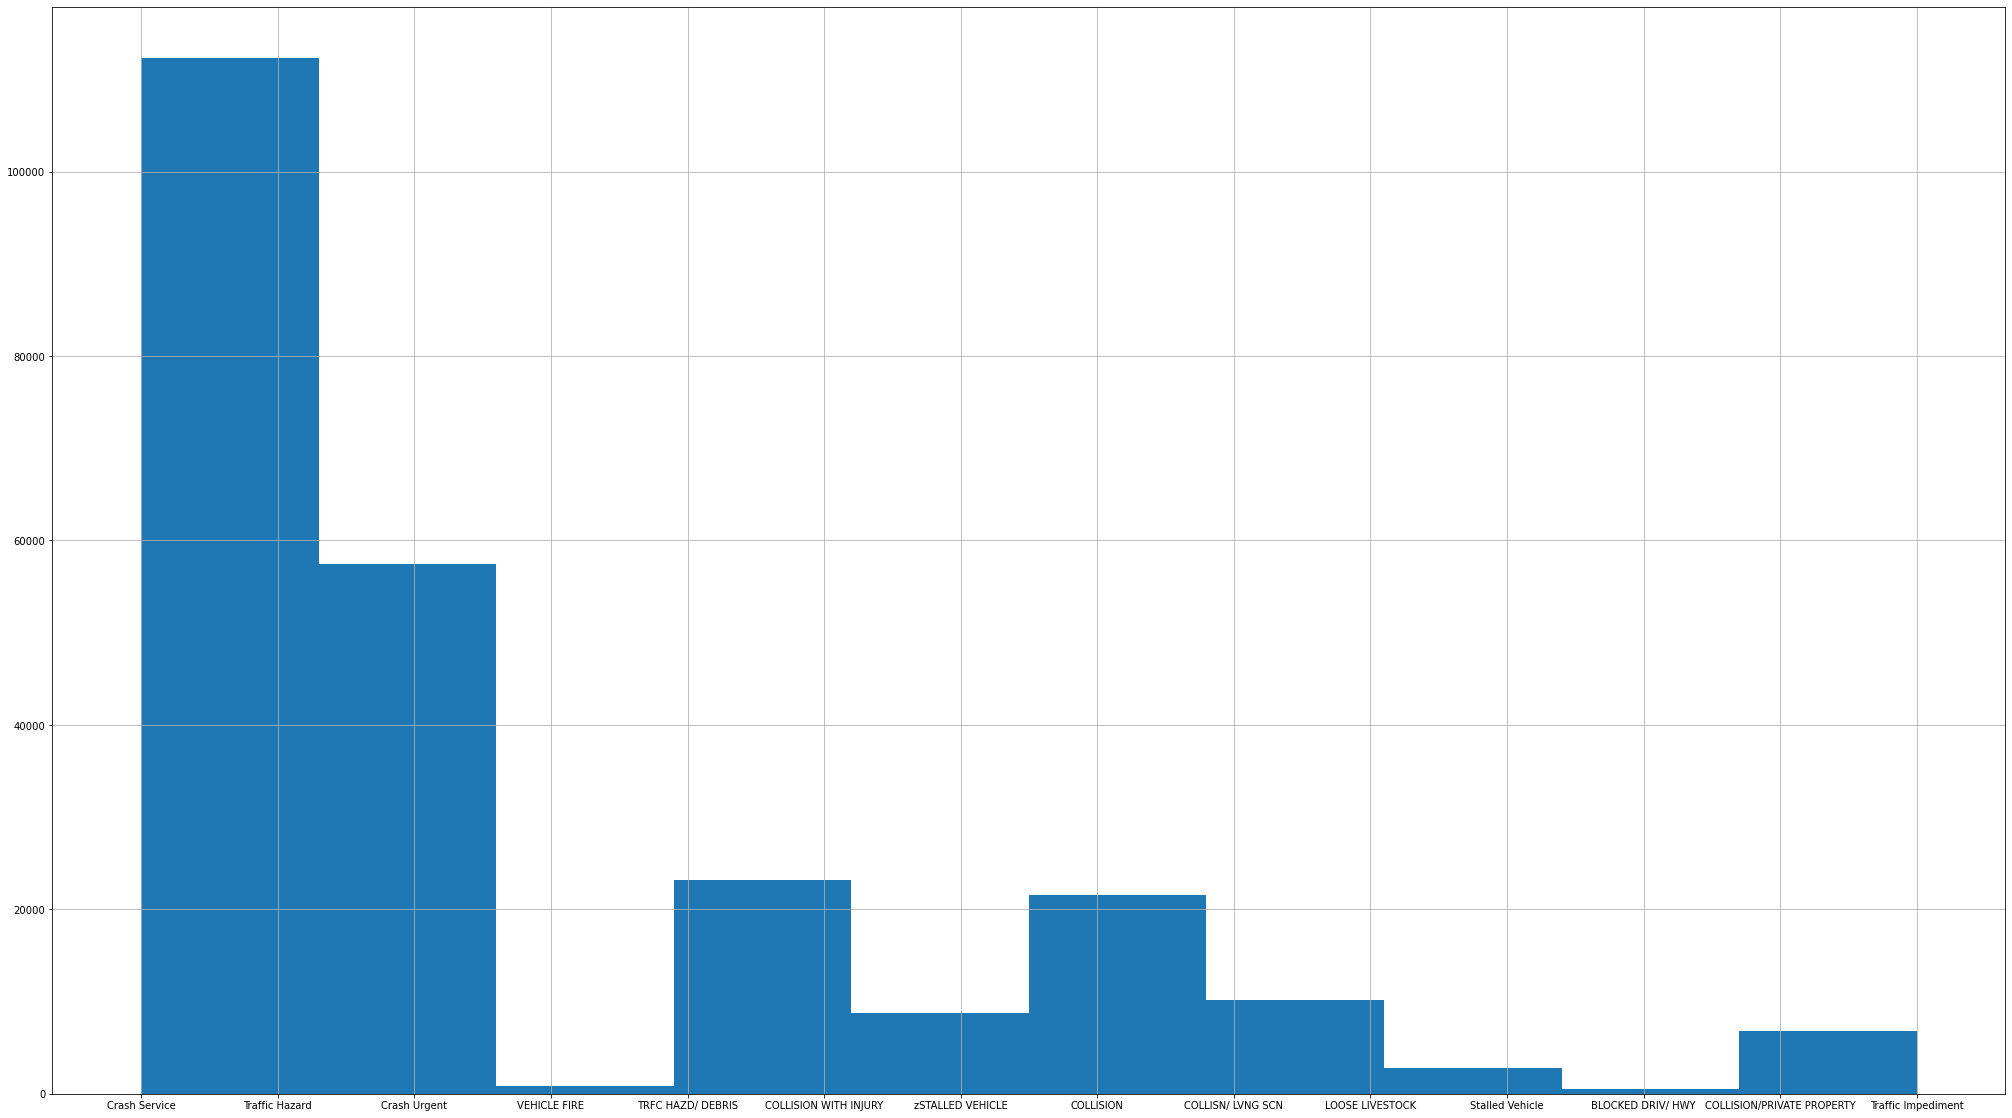

In [145]:
df.issue_reported.hist(figsize=(35,20))
plt.subplots_adjust(hspace=.5);

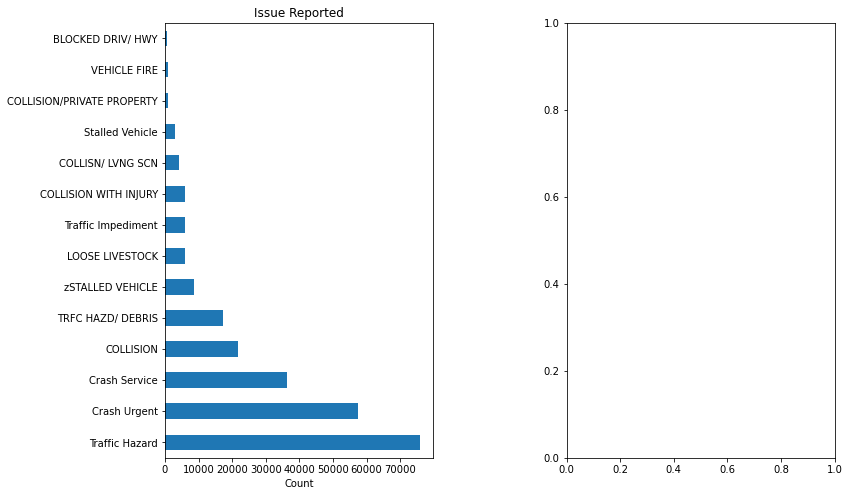

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
df.issue_reported.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Issue Reported')
ax[0].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);


In [147]:
#df.plot.line(x='timespan_min', y='issue_reported')
#Why doesn't this work?

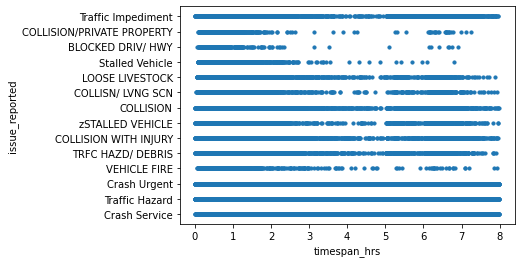

In [148]:
df.plot.scatter(y="issue_reported", x= "timespan_hrs", s = 10);

In [150]:
df.loc[~(df['published_day'] == df['status_day'])]
#Way too many days not matched up to drop. I will have to use published day to find my correlation

,published_date,issue_reported,Location,Latitude,Longitude,Address,status_date,published_day,status_day,issue_timespan,timespan_sec,timespan_min,timespan_hrs
short_ID,,,,,,,,,,,,,
5E7,2020-04-17 21:44:39+00:00,Crash Urgent,"(30.353742,-97.690482)",30.353742,-97.690482,9001 N Ih 35 Svrd Nb,2020-04-18 00:05:28+00:00,4,5,0 days 02:20:49,8449.0,140.816667,2.346944
FF3,2020-04-17 23:29:26+00:00,Crash Service,"(30.205068,-97.775196)",30.205068,-97.775196,107 W STASSNEY LN,2020-04-18 00:00:05+00:00,4,5,0 days 00:30:39,1839.0,30.650000,0.510833
2B6,2020-04-17 22:53:45+00:00,Crash Urgent,"(30.229962,-97.864551)",30.229962,-97.864551,W William Cannon Dr & Escarpment Blvd,2020-04-18 00:40:04+00:00,4,5,0 days 01:46:19,6379.0,106.316667,1.771944
23C,2020-10-28 23:47:11+00:00,COLLISN/ LVNG SCN,"(30.438657,-97.671975)",30.438657,-97.671975,14600 Owen Tech Blvd,2020-10-29 00:05:03+00:00,2,3,0 days 00:17:52,1072.0,17.866667,0.297778
FF3,2020-10-28 23:50:54+00:00,LOOSE LIVESTOCK,"(30.242404,-97.523623)",30.242404,-97.523623,18580 Fm 969 Rd,2020-10-29 00:10:03+00:00,2,3,0 days 00:19:09,1149.0,19.150000,0.319167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
B33,2021-12-12 22:05:40+00:00,Crash Service,"(30.366005,-97.683512)",30.366005,-97.683512,10100 N Ih 35 Svrd Sb,2021-12-13 00:35:03+00:00,6,0,0 days 02:29:23,8963.0,149.383333,2.489722
2B3,2021-12-12 23:56:32+00:00,Crash Service,"(30.162182,-97.789085)",30.162182,-97.789085,9500 S Ih 35 Svrd Sb,2021-12-13 00:50:04+00:00,6,0,0 days 00:53:32,3212.0,53.533333,0.892222
FF1,2021-12-12 22:58:12+00:00,Crash Urgent,"(30.448448,-97.791588)",30.448448,-97.791588,9600-9617 Anderson Mill Rd,2021-12-13 01:05:04+00:00,6,0,0 days 02:06:52,7612.0,126.866667,2.114444


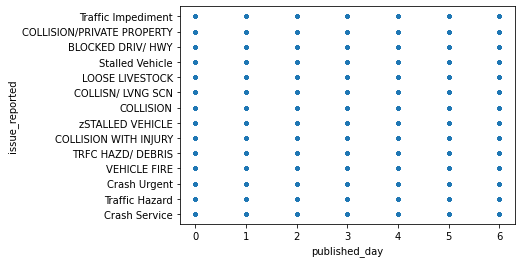

In [151]:
df.plot.scatter(y="issue_reported", x= "published_day", s = 10);

The next thing I need to do is take latitude and logitude and put them in a scatter plot over a map.